# import data

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")#, force_remount=True)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/MyDrive/AI_Summit2021-PreHackthon

/content/gdrive/MyDrive/AI_Summit2021-PreHackthon


In [ ]:
import pandas as pd
import numpy as np


In [ ]:

from sklearn.model_selection import train_test_split
df = pd.read_csv('train_dataset.csv')
train, test = train_test_split(df, test_size=0.1)

y_check=pd.DataFrame()
y_check=test['next_month_plan']
test=test.drop('next_month_plan',axis=1)

In [ ]:
train = pd.read_csv('train_dataset.csv')

#test = pd.read_csv('train_dataset.csv')
#test=test.drop('next_month_plan',axis=1)
test = pd.read_csv('test_dataset.csv')

# 1.   Missing values: 10500
```
dusage_avg 92%,vusage_onnet_avg17%,vusage_offnet_avg 68%
```





* dusage_avg - 9642 -Skewed -Median
* vusage_onnet_avg - 1828 -Skewed -Median
* vusage_offnet_avg- 7187 -Skewed -Median
* add_on_tot_rental	- 6667 -Skewed -0
* add_on_count - 6667 - Skewed -0

* device_type 23 - Skewed - Mode
* device_category 30 - Skewed - Mode
* gender 135 - Skewed - Mode
* age_group 135 - Skewed - Mode

In [ ]:
train.dusage_avg.fillna(train.dusage_avg.median(),inplace=True)
train.vusage_onnet_avg.fillna(train.vusage_onnet_avg.median(),inplace=True)
train.vusage_offnet_avg.fillna(train.vusage_offnet_avg.median(),inplace=True)
train.add_on_tot_rental.fillna(0,inplace=True)#train.add_on_tot_rental.median(),inplace=True)
train.add_on_count.fillna(0,inplace=True)#train.add_on_count.median(),inplace=True)

train.device_type.fillna(str(train.device_type.mode()),inplace=True)
train.device_category.fillna(str(train.device_category.mode()),inplace=True)
train.gender.fillna(str(train.gender.mode()),inplace=True)
train.age_group.fillna(str(train.age_group.mode()),inplace=True)

In [ ]:
test.dusage_avg.fillna(train.dusage_avg.median(),inplace=True)
test.vusage_onnet_avg.fillna(train.vusage_onnet_avg.median(),inplace=True)
test.vusage_offnet_avg.fillna(train.vusage_offnet_avg.median(),inplace=True)
test.add_on_tot_rental.fillna(0,inplace=True)#train.add_on_tot_rental.median(),inplace=True)
test.add_on_count.fillna(0,inplace=True)#train.add_on_count.median(),inplace=True)

test.device_type.fillna(str(train.device_type.mode()),inplace=True)
test.device_category.fillna(str(train.device_category.mode()),inplace=True)
test.gender.fillna(str(train.gender.mode()),inplace=True)
test.age_group.fillna(str(train.age_group.mode()),inplace=True)

In [ ]:
print(train.shape)
print(test.shape)
#train.isnull().sum()

(10500, 31)
(4500, 30)


# Label Encoding

In [ ]:
#!pip install category_encoders
import category_encoders as ce
df_train_enc=train
df_test_enc=test

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_train_enc['next_month_plan']=le.fit_transform(train['next_month_plan'])

cat_feat = ['age_group','gender','device_type','device_category' ,'district_name']
df_train_enc=df_train_enc.drop(cat_feat,axis=1,inplace=False)
df_test_enc=df_test_enc.drop(cat_feat,axis=1,inplace=False)

ageencoder= ce.OrdinalEncoder(cols=['age_group'],return_df=True,mapping=[{'col':'age_group','mapping':{'<20':20,'20-30':20,'30-40':40,'40-50':50,'50-60':60,'60-70':70,'>70':80}}])
df_train_enc['age_group'] = ageencoder.fit_transform(train['age_group'])
df_test_enc['age_group'] = ageencoder.fit_transform(test['age_group'])

gendencorder=ce.OrdinalEncoder(cols=['gender'],return_df=True,mapping=[{'col':'gender','mapping':{'MALE':1,'FEMALE':0}}])
df_train_enc['gender'] = gendencorder.fit_transform(train['gender'])
df_test_enc['gender'] = gendencorder.fit_transform(test['gender'])

l_device_type=LabelEncoder()
l_device_category=LabelEncoder()
l_district_name=LabelEncoder()
df_train_enc['device_type']=l_device_type.fit_transform(train['device_type'])
df_test_enc['device_type']=l_device_type.fit_transform(test['device_type'])

df_train_enc['device_category']=l_device_category.fit_transform(train['device_category'])
df_test_enc['device_category']=l_device_category.fit_transform(test['device_category'])

df_train_enc['district_name']=l_district_name.fit_transform(train['district_name'])
df_test_enc['district_name']=l_district_name.fit_transform(test['district_name'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


# Encoding

Label Encoding

In [ ]:
df_train_enc=train
df_test_enc=test

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_train_enc['next_month_plan']=le.fit_transform(train['next_month_plan'])

In [ ]:
#le.classes_
le.inverse_transform([0,1,2,3,4,5,6])
# dict(zip(le.inverse_transform([0,1,2,3,4,5,6]),[0,1,2,3,4,5,6]))

array(['PKG1', 'PKG2', 'PKG3', 'PKG4', 'PKG5', 'PKG6', 'PKG7'],
      dtype=object)

categorical data encoding

In [ ]:
!pip install category_encoders
import category_encoders as ce
cat_feat = ['age_group','gender','device_type','device_category' ,'district_name']
df_train_enc=df_train_enc.drop(cat_feat,axis=1,inplace=False)
df_test_enc=df_test_enc.drop(cat_feat,axis=1,inplace=False)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# create object of Ordinalencoding
ageencoder= ce.OrdinalEncoder(cols=['age_group'],return_df=True,mapping=[{'col':'age_group','mapping':{'<20':20,'20-30':20,'30-40':40,'40-50':50,'50-60':60,'60-70':70,'>70':80}}])
df_train_enc['age_group'] = ageencoder.fit_transform(train['age_group'])
df_test_enc['age_group'] = ageencoder.fit_transform(test['age_group'])

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
ageencoder

OrdinalEncoder(cols=['age_group'], drop_invariant=False, handle_missing='value',
               handle_unknown='value',
               mapping=[{'col': 'age_group',
                         'mapping': {'20-30': 20, '30-40': 40, '40-50': 50,
                                     '50-60': 60, '60-70': 70, '<20': 20,
                                     '>70': 80}}],
               return_df=True, verbose=0)

In [ ]:
#gender with binary encoding
#gendencorder=ce.BinaryEncoder(cols=['gender'],return_df=True)
gendencorder=ce.OrdinalEncoder(cols=['gender'],return_df=True,mapping=[{'col':'gender','mapping':{'MALE':1,'FEMALE':0}}])
df_train_enc['gender'] = gendencorder.fit_transform(train['gender'])
df_test_enc['gender'] = gendencorder.fit_transform(test['gender'])

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
#device_type with Binary encoding
#devtypeencorder=ce.HashingEncoder(cols='device_type',n_components=2)
devtypeencorder=ce.BinaryEncoder(cols=['device_type'])
df_devtypeencorder = devtypeencorder.fit_transform(train['device_type'])
df_train_enc = pd.concat([df_train_enc, df_devtypeencorder], axis=1)
print(df_devtypeencorder.shape)

df_devtypeencorder = devtypeencorder.transform(test['device_type'])
df_test_enc = pd.concat([df_test_enc, df_devtypeencorder], axis=1)
print(df_devtypeencorder.shape)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


(10500, 3)
(4500, 3)


In [ ]:
"""
#device_type with Binary encoding
devcatencoder=ce.BinaryEncoder(cols=['device_category'])
df_devcatencoder = devcatencoder.fit_transform(train['device_category'])
df_devcatencoder
#df_train_enc = pd.concat([df_train_enc, df_devcatencoder], axis=1)
#df_train_enc=df_train_enc.drop('device_category',axis=1,inplace=False)
#print(df_train_enc[['device_type_0','device_type_1','device_type_2']])
"""

"\n#device_type with Binary encoding\ndevcatencoder=ce.BinaryEncoder(cols=['device_category'])\ndf_devcatencoder = devcatencoder.fit_transform(train['device_category'])\ndf_devcatencoder\n#df_train_enc = pd.concat([df_train_enc, df_devcatencoder], axis=1)\n#df_train_enc=df_train_enc.drop('device_category',axis=1,inplace=False)\n#print(df_train_enc[['device_type_0','device_type_1','device_type_2']])\n"

In [ ]:
devcatencoder= ce.BaseNEncoder(cols=['device_category'],return_df=True,base=3,handle_unknown='value')
df_devcatencoder = devcatencoder.fit_transform(train['device_category'])
df_train_enc = pd.concat([df_train_enc, df_devcatencoder], axis=1)
print(df_devcatencoder.shape)

df_devcatencoder = devcatencoder.transform(test['device_category'])
df_test_enc = pd.concat([df_test_enc, df_devcatencoder], axis=1)
print(df_devcatencoder.shape)
#print(df_train_enc[['device_category_0','device_category_1','device_category_2']])

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


(10500, 3)
(4500, 3)


In [ ]:
districtencoder= ce.BaseNEncoder(cols=['district_name'],return_df=True,base=5)
df_districtencoder = districtencoder.fit_transform(train['district_name'])
df_train_enc = pd.concat([df_train_enc, df_districtencoder], axis=1)
print(df_districtencoder.shape)

df_districtencoder = districtencoder.transform(test['district_name'])
df_test_enc = pd.concat([df_test_enc, df_districtencoder], axis=1)
print(df_districtencoder.shape)
#print(df_train_enc[['district_name_0','district_name_1','district_name_2','district_name_3']])

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


(10500, 4)
(4500, 4)


In [ ]:
print(df_train_enc.shape)
print(df_test_enc.shape)

(10500, 38)
(4500, 37)


# oversampling SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

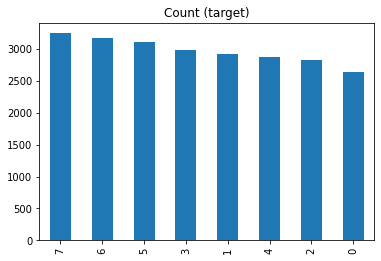

In [ ]:
from imblearn.combine import SMOTETomek

X_feat=df_train_enc.drop('next_month_plan',axis=1)
Y_feat=df_train_enc['next_month_plan']

smote = SMOTETomek(ratio='auto')
X_sm, y_sm = smote.fit_sample(X_feat, Y_feat)

X_sm = pd. DataFrame(X_sm, columns=list(X_feat.columns))
y_sm = pd. DataFrame(y_sm, columns=['next_month_plan'])
df_train_smt = pd.concat([X_sm,y_sm], axis=1)
df_train_smt.next_month_plan.value_counts().plot(kind='bar', title='Count (target)');

In [ ]:
df_train_smt.head()

,primary_identifier,network_stay,average_monthly_bill_amount,dusage_sum,dusage_min,dusage_max,dusage_avg,dusage_days,dusage_stddev,vusage_onnet_sum,vusage_onnet_max,vusage_onnet_min,vusage_onnet_days,vusage_onnet_avg,vusage_onnet_stddev,vusage_offnet_sum,vusage_offnet_max,vusage_offnet_min,vusage_offnet_days,vusage_offnet_avg,vusage_offnet_stddev,number_of_fixed_bb_accounts,number_of_iptv_accounts,add_on_tot_rental,add_on_count,age_group,gender,device_type_0,device_type_1,device_type_2,device_category_0,device_category_1,device_category_2,district_name_0,district_name_1,district_name_2,district_name_3,next_month_plan
0,1853666.0,24.0,2397.49,91071.0,22.437842,7523.355693,3035.708609,30.0,2174.203127,0.0,0.000000,0.0,0.0,9.277778,0.000000,0.0,0.000000,0.0,0.0,4.419298,0.000000,0.0,0.0,1110.0,2.0,50.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,3
1,3619017.0,30.0,495.54,0.0,0.001531,0.173772,0.020356,30.0,0.034965,0.0,0.000000,0.0,0.0,9.277778,0.000000,2.0,1.066667,0.0,3.0,0.700000,0.233432,0.0,0.0,0.0,0.0,50.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0
2,7633257.0,35.0,1977.19,14782.0,205.394300,1001.028832,492.737055,30.0,177.211955,0.0,0.000000,0.0,0.0,9.277778,0.000000,0.0,0.000000,0.0,0.0,4.419298,0.000000,0.0,0.0,110.0,1.0,40.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4
3,5507217.0,170.0,2925.00,3473.0,6.426329,1132.109515,115.785698,30.0,222.353815,43.0,9.966667,0.0,7.0,6.147619,2.939495,0.0,0.000000,0.0,0.0,4.419298,0.000000,0.0,0.0,650.0,1.0,40.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,4
4,7566055.0,48.0,473.59,3870.0,0.000000,1180.032728,552.976737,7.0,337.334503,7.0,6.700000,0.0,2.0,3.575000,1.313412,34.0,22.883333,0.0,3.0,11.338889,4.661264,0.0,0.0,110.0,1.0,20.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1


In [ ]:
df_train_smt.dtypes

primary_identifier             float64
network_stay                   float64
average_monthly_bill_amount    float64
dusage_sum                     float64
dusage_min                     float64
dusage_max                     float64
dusage_avg                     float64
dusage_days                    float64
dusage_stddev                  float64
vusage_onnet_sum               float64
vusage_onnet_max               float64
vusage_onnet_min               float64
vusage_onnet_days              float64
vusage_onnet_avg               float64
vusage_onnet_stddev            float64
vusage_offnet_sum              float64
vusage_offnet_max              float64
vusage_offnet_min              float64
vusage_offnet_days             float64
vusage_offnet_avg              float64
vusage_offnet_stddev           float64
number_of_fixed_bb_accounts    float64
number_of_iptv_accounts        float64
add_on_tot_rental              float64
add_on_count                   float64
age_group                

# Calculated fields

In [ ]:
df_train_cal=df_train_smt
df_test_cal=df_test_enc

In [ ]:
df_train_cal['additional_accounts']=df_train_cal['number_of_fixed_bb_accounts'].astype(int) + df_train_cal['number_of_iptv_accounts'].astype(int)
df_test_cal['additional_accounts']=df_test_cal['number_of_fixed_bb_accounts'].astype(int) + df_test_cal['number_of_iptv_accounts'].astype(int)

df_train_cal['is_overpaid']=np.where(df_train_cal['average_monthly_bill_amount']<0,1,0)
df_test_cal['is_overpaid']=np.where(df_test_cal['average_monthly_bill_amount']<0,1,0)

In [ ]:
df_train_cal['log10_add_on_tot_rental'] = np.log10(df_train_smt.add_on_tot_rental + 0.00001)
df_train_cal['log10_average_monthly_bill_amount'] = np.log10(df_train_smt.average_monthly_bill_amount + 0.00001)
df_train_cal=df_train_cal.drop(['add_on_tot_rental','average_monthly_bill_amount'],axis=1)

df_test_cal['log10_add_on_tot_rental'] = np.log10(df_test_enc.add_on_tot_rental + 0.00001)
df_test_cal['log10_average_monthly_bill_amount'] = np.log10(df_test_enc.average_monthly_bill_amount + 0.00001)
df_test_cal=df_test_cal.drop(['add_on_tot_rental','average_monthly_bill_amount'],axis=1)

df_train_cal.log10_add_on_tot_rental.fillna(np.log10(0.00001),inplace=True)
df_train_cal.log10_average_monthly_bill_amount.fillna(np.log10(0.00001),inplace=True)
df_test_cal.log10_add_on_tot_rental.fillna(np.log10(0.00001),inplace=True)
df_test_cal.log10_average_monthly_bill_amount.fillna(np.log10(0.00001),inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


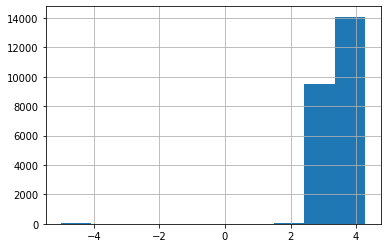

In [ ]:
df_train_cal.log10_average_monthly_bill_amount.hist()

In [ ]:
df_test_cal.isnull().sum()

primary_identifier                   0
network_stay                         0
dusage_sum                           0
dusage_min                           0
dusage_max                           0
dusage_avg                           0
dusage_days                          0
dusage_stddev                        0
vusage_onnet_sum                     0
vusage_onnet_max                     0
vusage_onnet_min                     0
vusage_onnet_days                    0
vusage_onnet_avg                     0
vusage_onnet_stddev                  0
vusage_offnet_sum                    0
vusage_offnet_max                    0
vusage_offnet_min                    0
vusage_offnet_days                   0
vusage_offnet_avg                    0
vusage_offnet_stddev                 0
number_of_fixed_bb_accounts          0
number_of_iptv_accounts              0
add_on_count                         0
age_group                            0
gender                               0
device_type_0            

# Model | Training 

In [ ]:
df_training=df_train_cal #df_train_over , df_train_under, df_train_enc, df_train_smt
df_tesing=df_test_cal #df_test_enc
#5 covariate features : 'device_category', 'dusage_avg','dusage_stddev', 'vusage_onnet_stddev', 'vusage_offnet_stddev'
#0 missing values: dusage_avg 92%,vusage_onnet_avg17%,vusage_offnet_avg 68%
#1 zero variance: 'vusage_onnet_min'
droplogreg=['vusage_onnet_min', 'vusage_offnet_min', 'number_of_fixed_bb_accounts', 'number_of_iptv_accounts', 'add_on_count', 'age_group', 'gender', 'device_type_0', 'device_type_1', 'device_type_2', 'device_category_0', 'device_category_1', 'device_category_2', 'district_name_0', 'district_name_1', 'district_name_2', 'district_name_3']
droprf=[ 'average_monthly_bill_amount', 'dusage_sum', 'dusage_min', 'dusage_max', 'dusage_avg', 'dusage_stddev', 'vusage_onnet_min', 'vusage_offnet_min', 'number_of_fixed_bb_accounts', 'number_of_iptv_accounts', 'add_on_tot_rental', 'device_type_0', 'device_category_0', 'device_category_1', 'district_name_0', 'district_name_1']

#networkstay,nextmonthlybillamount,vusageonnetmin,vusageoffnetmin,nooffbbaccounts,addontotalrental,addoncount,devicetype0,devicetype1,devicetype2,devicecat0,devicecat1,devicecat2,district0
dropx=['number_of_fixed_bb_accounts', 'number_of_iptv_accounts','vusage_onnet_min', 'vusage_offnet_min', 'vusage_offnet_sum','vusage_onnet_avg']#, 'device_type_0']#,'dusage_sum', 'dusage_min', 'dusage_max','add_on_tot_rental,average_monthly_bill_amount,device_type_0
dropfeat=['next_month_plan','primary_identifier','dusage_avg','dusage_stddev', 'vusage_onnet_stddev', 'vusage_offnet_stddev']#,'district_name_0','district_name_1','district_name_2','district_name_3','device_category_0', 'device_category_1','device_category_2'] 

X=df_training.drop(dropfeat+dropx,axis=1)
Y=df_training['next_month_plan']

dropfeat=['primary_identifier', 'dusage_avg','dusage_stddev', 'vusage_onnet_stddev', 'vusage_offnet_stddev']#,'district_name_0','district_name_1','district_name_2','district_name_3','device_category_0', 'device_category_1','device_category_2',] 
X_tesing=df_tesing.drop(dropfeat+dropx,axis=1)

# ANOVA Feature selection

In [ ]:
df_training=df_train_cal #df_train_over , df_train_under, df_train_enc, df_train_smt
df_testing=df_test_cal #df_test_enc
X=df_training.drop('next_month_plan',axis=1)
Y=df_training['next_month_plan']
X_tesing=df_testing

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Create an SelectKBest object to select features with two best ANOVA F-Values
fvalue_selector = SelectKBest(f_classif, k=20)

# Apply the SelectKBest object to the features and target
X_kbest = fvalue_selector.fit_transform(X, Y)
X_kbest_test=fvalue_selector.transform(X_tesing)

X=X_kbest
X_tesing=X_kbest_test

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [10 28 31] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


# EFS Feature selection

In [ ]:
X_fs=df_training.drop('next_month_plan',axis=1)
Y_fs=df_training['next_month_plan']

X_tesing_fs=df_testing

from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
efs = EFS(estimator=rf,        # Use logistic regression as the classifier/estimator
          min_features=1,      # The minimum number of features to consider is 1
          max_features=18,      # The maximum number of features to consider is 4
          scoring='accuracy',  # The metric to use to evaluate the classifier is accuracy 
          cv=5)                # The number of cross-validations to perform is 5

# Train EFS with our dataset
efs = efs.fit(X_fs, Y_fs)

# Print the results
print('Best accuracy score: %.2f' % efs.best_score_) # best_score_ shows the best score 
print('Best subset (indices):', efs.best_idx_)       # best_idx_ shows the index of features that yield the best score 
print('Best subset (corresponding names):', efs.best_feature_names_) # best_feature_names_ shows the feature names 
efs_results = pd.DataFrame.from_dict(efs.get_metric_dict())

# Normalize Standadize

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
#scaler = preprocessing.Normalizer().fit(X)
#print(scaler.mean_)
#print(scaler.scale_)
X = scaler.transform(X)
X_tesing = scaler.transform(X_tesing)

In [ ]:
print(X.shape)
print(X_tesing.shape)
#scaler

(20978, 21)
(1050, 21)


In [ ]:
from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test = train_test_split(X, Y, stratify=Y, test_size = 0.3,random_state = 42)
X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size = 0.3,random_state = 42)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

def draw_confusion_matrix(cm):
    plt.figure(figsize=(12,8))
    sns.heatmap(cm,annot=True,fmt="d", center=0, cmap='autumn') 
    plt.title("Confusion Matrix")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

logreg = LogisticRegression(random_state=42,max_iter=200,solver='liblinear') #newton-cg", "sag", "lbfgs" and "liblinear"
logreg.fit(X_train, y_train)

y_predict_train_logreg = logreg.predict(X_train)
y_predict_test_logreg = logreg.predict(X_test)

train_accuracy_score_logreg = accuracy_score(y_train, y_predict_train_logreg)
test_accuracy_score_logreg = accuracy_score(y_test, y_predict_test_logreg)

print(train_accuracy_score_logreg)
print(test_accuracy_score_logreg)

0.407032145226464
0.40424933164485716


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print(classification_report(y_test,y_predict_test_logreg))
print(f"Accuracy score: {accuracy_score(y_test,y_predict_test_logreg)}")

              precision    recall  f1-score   support

           0       0.46      0.52      0.48       779
           1       0.38      0.29      0.33       905
           2       0.31      0.18      0.23       825
           3       0.40      0.48      0.43       901
           4       0.40      0.59      0.47       860
           5       0.38      0.28      0.32       924
           6       0.38      0.29      0.33       974
           7       0.45      0.62      0.52       939

    accuracy                           0.40      7107
   macro avg       0.40      0.41      0.39      7107
weighted avg       0.39      0.40      0.39      7107

Accuracy score: 0.40424933164485716


In [ ]:
from sklearn.metrics import f1_score
print(f"f1_score-macro: {f1_score(y_test,y_predict_test_logreg, average='macro')}")

f1_score-macro: 0.39027997381810636


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, X, Y, cv=5)
print(scores)

[0.31535533 0.33608291 0.35913706 0.37381003 0.36238629]


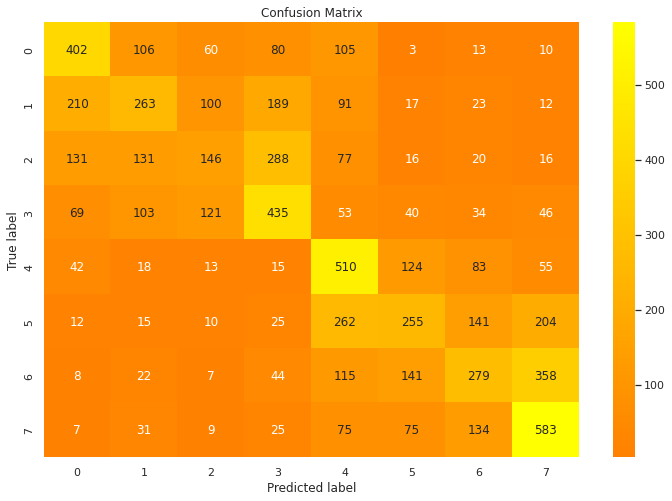

In [ ]:
cm_logreg = confusion_matrix(y_test,y_predict_test_logreg)
draw_confusion_matrix(cm_logreg)

# Logreg Hyper parameter tuning

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.model_selection import GridSearchCV
from pprint import pprint

random_grid = {'C': [1.0,0.1,0.01],
               #'class_weight': 'balanced',
               'dual': [True, False],
               'multi_class': ['auto', 'ovr', 'multinomial'],
               'tol':[0.0001,0.001,0.01],
               'penalty':['l1', 'l2', 'elasticnet', 'none'],
               'solver':['newton-cg', 'lbfgs','liblinear', 'sag', 'saga']}
pprint(random_grid)

logreggrid = GridSearchCV(logreg, random_grid, cv=3,scoring='f1_macro',n_jobs = -1) #n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1
logreggrid.fit(X, Y)
print(logreggrid.best_params_)

{'C': [1.0, 0.1, 0.01],
 'dual': [True, False],
 'multi_class': ['auto', 'ovr', 'multinomial'],
 'penalty': ['l1', 'l2', 'elasticnet', 'none'],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'tol': [0.0001, 0.001, 0.01]}


KeyboardInterrupt: ignored

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

base_accuracy = evaluate(logreg, X, Y)

best_logreg = logreggrid.best_estimator_
random_accuracy = evaluate(best_logreg, X, Y)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 1.1918 degrees.
Accuracy = -inf%.
Model Performance
Average Error: 0.8759 degrees.
Accuracy = -inf%.
Improvement of nan%.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


# RandomForestClassifier

In [ ]:
X.shape

(23714, 28)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

#random_state=42, n_estimators=50, max_depth=6, criterion = 'entropy',min_samples_leaf= 1,min_samples_split= 2)
#random_state=42, n_estimators=200,criterion='entropy',bootstrap= False,max_depth= 11,max_features= 'auto',min_samples_leaf= 1,min_samples_split= 2)
#rf opt: {'bootstrap': [True, False], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
#best: 'bootstrap': False, 'criterion': 'entropy', 'max_depth': 14, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 246
#rf = RandomForestClassifier(random_state=42,bootstrap=False,criterion='gini',max_depth=13,max_features='auto',min_samples_leaf= 1,min_samples_split= 4,n_estimators=35)
# rf=RandomForestClassifier(n_estimators=88, criterion='entropy', max_depth=20, min_samples_split=3, min_samples_leaf=1, max_features='sqrt', bootstrap=False, random_state=42, verbose=0)#, max_samples=16620)
rf=RandomForestClassifier(n_estimators=95, criterion='entropy', max_depth=11, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', bootstrap=False, random_state=42, verbose=0)
rf.fit(X_train, y_train)

y_predict_train_rf = rf.predict(X_train)
y_predict_test_rf = rf.predict(X_test)

train_accuracy_score_rf = accuracy_score(y_train, y_predict_train_rf)
test_accuracy_score_rf = accuracy_score(y_test, y_predict_test_rf)

print(train_accuracy_score_rf)
print(test_accuracy_score_rf)

0.8452144618901521
0.6453333333333333


In [ ]:
print(train_accuracy_score_rf)
print(test_accuracy_score_rf)
rf

0.8465379293749624
0.6449122807017544


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=11, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=90,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:

from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_test_rf))
print(f"Accuracy score: {accuracy_score(y_test,y_predict_test_rf)}")

              precision    recall  f1-score   support

           0       0.74      0.71      0.72       783
           1       0.69      0.61      0.65       909
           2       0.61      0.52      0.56       841
           3       0.64      0.81      0.71       888
           4       0.71      0.68      0.70       848
           5       0.70      0.67      0.69       903
           6       0.80      0.78      0.79       987
           7       0.78      0.88      0.83       956

    accuracy                           0.71      7115
   macro avg       0.71      0.71      0.70      7115
weighted avg       0.71      0.71      0.71      7115

Accuracy score: 0.7103302881236824


In [ ]:
from sklearn.metrics import f1_score
print(f"f1_score-macro: {f1_score(y_test,y_predict_test_rf, average='macro')}")

f1_score-macro: 0.6676096134145189


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X, Y, cv=5)
print(scores)

[0.58042105 0.62189474 0.68189474 0.66119183 0.66561381]


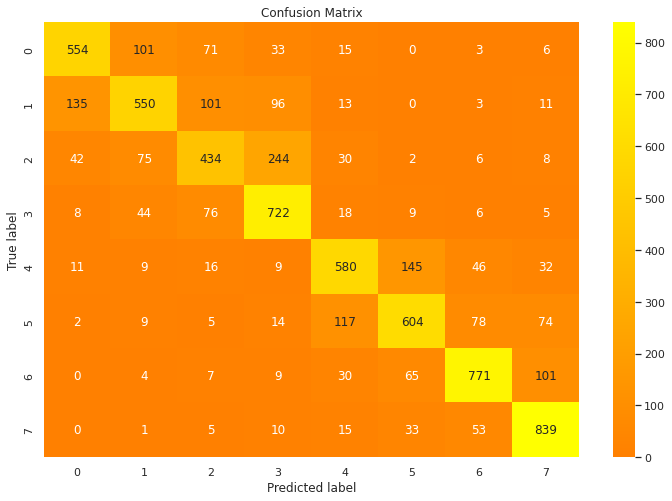

In [ ]:
cm_rf = confusion_matrix(y_test,y_predict_test_rf)
draw_confusion_matrix(cm_rf)

In [ ]:
# save
import joblib
joblib.dump(rf, "./rf_sub11nswd_1l.joblib")

['./rf_sub11nswd_1l.joblib']

In [ ]:
#sns.pairplot(df_train_enc.drop('primary_identifier', axis=1), aspect=1.5)
#plt.show()

In [ ]:
# Threshold for removing correlated variables
threshold = 0.9

corr_matrix = train.corr().abs()        # Absolute value correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))                 # Upper triangle of correlations
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]                    ## Select columns with correlations above threshold
train_dropped = train.drop(columns = to_drop)
print(to_drop)

['dusage_avg', 'dusage_stddev', 'vusage_onnet_avg', 'vusage_onnet_stddev', 'vusage_offnet_stddev']


# IDK 1

In [ ]:
import numpy as np 
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler 
from hyperopt import tpe, hp, fmin, STATUS_OK,Trials
from hyperopt.pyll.base import scope

import warnings
warnings.filterwarnings("ignore")

In [ ]:
space = {
    "n_estimators": hp.choice("n_estimators", [100, 200, 300, 400,500,600]),
    "max_depth": hp.quniform("max_depth", 1, 15,1),
    "criterion": hp.choice("criterion", ["gini", "entropy"]),
}
def hyperparameter_tuning(params):
    clf = RandomForestClassifier(**params,n_jobs=-1)
    acc = cross_val_score(clf, X, Y,scoring="f1_macro").mean()
    return {"loss": -acc, "status": STATUS_OK}

trials = Trials()

best = fmin(
    fn=hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=100, 
    trials=trials
)

print("Best: {}".format(best))

trials.results

  3%|▎         | 3/100 [06:00<3:14:17, 120.18s/it, best loss: -0.6895073212261107]


KeyboardInterrupt: ignored

In [ ]:
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

# NN

In [ ]:
X.shape

(23638, 20)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

def baseline_model():
    # Create model here
    model = Sequential()
    model.add(Dense(15, input_dim = 20, activation = 'relu')) # Rectified Linear Unit Activation Function
    model.add(Dense(15, activation = 'relu'))
    model.add(Dense(8, activation = 'softmax')) # Softmax for multi-class classification
    # Compile model here
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

In [ ]:
from sklearn.model_selection import KFold
seed = 10
np.random.seed(seed)

estimator = KerasClassifier(build_fn = baseline_model, epochs = 100, batch_size = 10, verbose = 0)


kfold = KFold(n_splits = 5, shuffle = True, random_state = seed)
results = cross_val_score(estimator, X, Y, cv = kfold)
# Result
print("Result: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

# Predicting

In [ ]:
# load, no need to initialize the loaded_rf
#loaded_rf = joblib.load("./rf_lowtrees_900_601_693.joblib")

In [ ]:
print(X_tesing.shape)

(4500, 28)


In [ ]:
#y_result_test_logreg = logreg.predict(X_test)
y_result_test_rf = rf.predict(X_tesing)

#y_result_pkg_logreg=le.inverse_transform(y_result_test_logreg)
y_result_pkg_rf=le.inverse_transform(y_result_test_rf)
y_result_pkg_rf

array(['PKG1', 'PKG1', 'PKG3', ..., 'PKG3', 'PKG8', 'PKG3'], dtype=object)

In [ ]:
d={'primary_identifier':list(df_tesing['primary_identifier']),'next_month_plan_pkg':y_result_pkg_rf,'next_month_plan_code':y_result_test_rf}
results_df = pd.DataFrame(d)
results_df

,primary_identifier,next_month_plan_pkg,next_month_plan_code
0,2003793,PKG1,0
1,1776101,PKG1,0
2,6945050,PKG3,2
3,2472049,PKG2,1
4,7197266,PKG5,4
...,...,...,...
4495,8830679,PKG7,6
4496,3839728,PKG3,2
4497,2166141,PKG3,2
4498,9426198,PKG8,7


In [ ]:
len(y_result_test_rf)

4500

In [ ]:
results_df.to_csv('rf_sub1_last.csv')

In [ ]:
y_check.shape

(1050,)

In [ ]:
from sklearn.metrics import f1_score

y_check_t=le.transform(y_check)
print(f"f1_score-macro: {f1_score(y_result_pkg_rf,y_check, average='macro')}")

In [ ]:
le.transform()

# Outliers

In [ ]:
features = df_training.columns
for col in features:
    df_training.boxplot(column=col, by='next_month_plan', figsize=(6,6))
    plt.title(col)
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

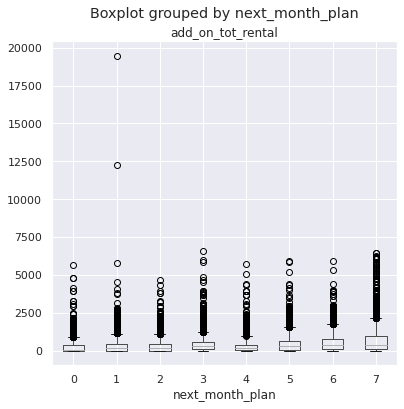

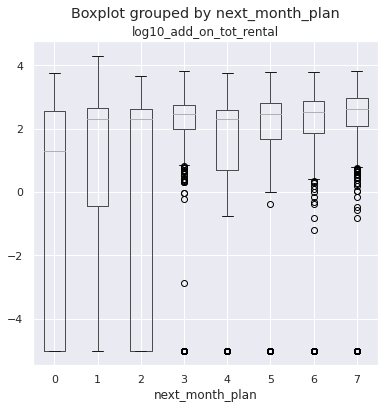

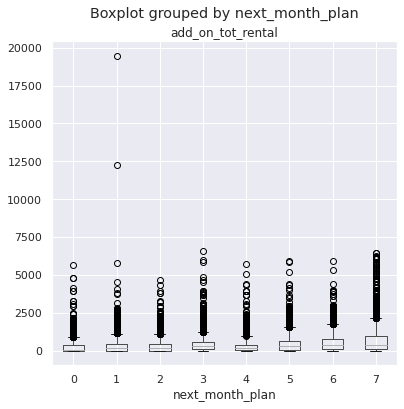

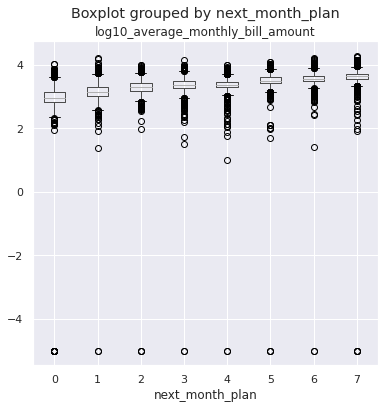

In [ ]:
features = ['add_on_tot_rental','log10_add_on_tot_rental','add_on_tot_rental','log10_average_monthly_bill_amount']
for col in features:
    df_train_cal.boxplot(column=col, by='next_month_plan', figsize=(6,6))
    plt.title(col)
plt.show()

In [ ]:
for column in df_training:
    plt.figure()
    df_training.boxplot([column])

In [ ]:
print(len(train.columns))
grphtrain=train.drop('primary_identifier',axis=1)
grphtrain.columns

31


Index(['device_type', 'device_category', 'gender', 'district_name',
       'age_group', 'network_stay', 'average_monthly_bill_amount',
       'dusage_sum', 'dusage_min', 'dusage_max', 'dusage_avg', 'dusage_days',
       'dusage_stddev', 'vusage_onnet_sum', 'vusage_onnet_max',
       'vusage_onnet_min', 'vusage_onnet_days', 'vusage_onnet_avg',
       'vusage_onnet_stddev', 'vusage_offnet_sum', 'vusage_offnet_max',
       'vusage_offnet_min', 'vusage_offnet_days', 'vusage_offnet_avg',
       'vusage_offnet_stddev', 'number_of_fixed_bb_accounts',
       'number_of_iptv_accounts', 'add_on_tot_rental', 'add_on_count',
       'next_month_plan'],
      dtype='object')

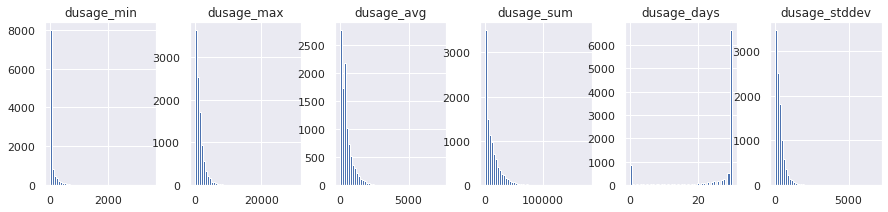

In [ ]:
grphtrain[[ 'dusage_min', 'dusage_max', 'dusage_avg','dusage_sum', 'dusage_days','dusage_stddev']].hist(figsize=(15,3),layout=(1,6),bins=50)
plt.show()

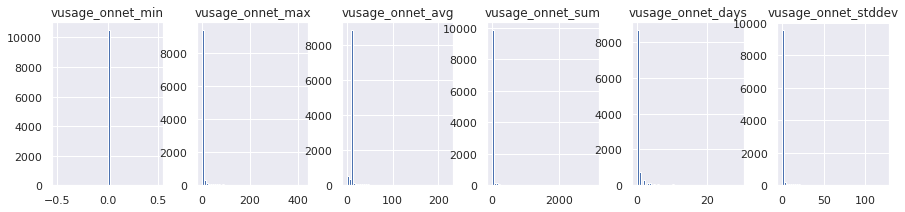

In [ ]:
grphtrain[['vusage_onnet_min', 'vusage_onnet_max', 'vusage_onnet_avg','vusage_onnet_sum', 'vusage_onnet_days','vusage_onnet_stddev']].hist(figsize=(15,3),layout=(1,6),bins=50)
plt.show()

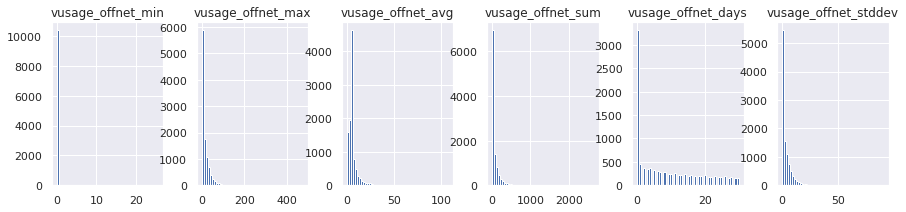

In [ ]:
grphtrain[['vusage_offnet_min', 'vusage_offnet_max','vusage_offnet_avg', 'vusage_offnet_sum','vusage_offnet_days', 'vusage_offnet_stddev']].hist(figsize=(15,3),layout=(1,6),bins=50)
plt.show()

LinAlgError: ignored

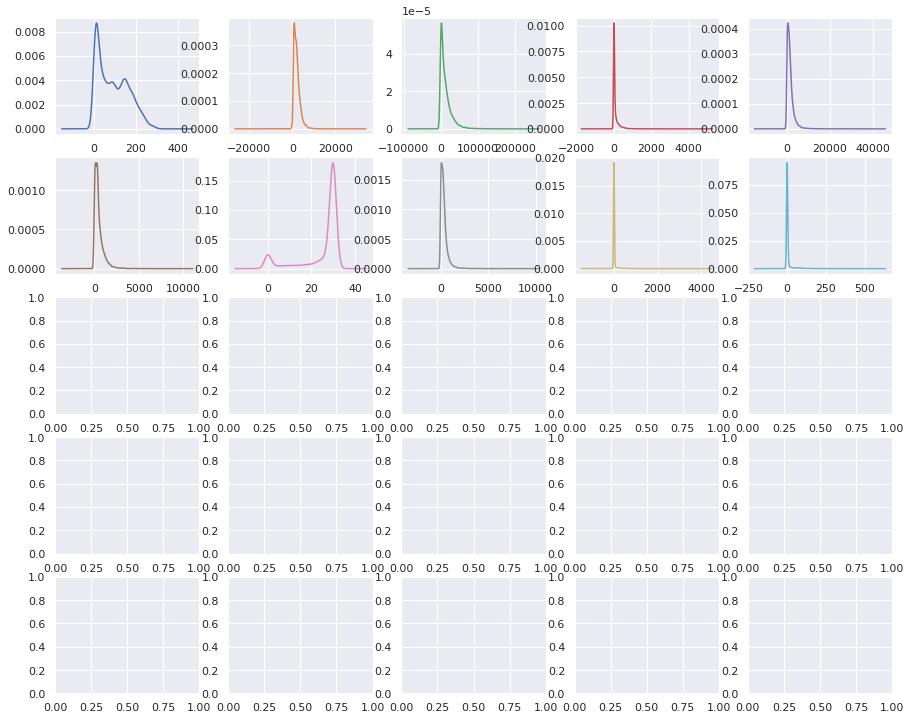

In [ ]:
grphtrain.plot(kind="density", layout=(6,5), 
             subplots=True,sharex=False, sharey=False, figsize=(15,15))
plt.show()

# RF Hyper parameter tuning

In [ ]:
rf #https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=11, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 150, stop = 300, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
criterion=['gini','entropy'],
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(8, 20, num = 4)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,3, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion':criterion}
pprint(random_grid)
#{'bootstrap': [True, False], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'max_features': ['auto', 'sqrt'],
# 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'bootstrap': [True, False],
 'criterion': (['gini', 'entropy'],),
 'max_depth': [8, 12, 16, 20, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 3],
 'min_samples_split': [2, 3, 5],
 'n_estimators': [150, 166, 183, 200, 216, 233, 250, 266, 283, 300]}


In [ ]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X, Y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 38.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 70.6min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='entropy',
                                                    max_depth=6,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 34,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

base_accuracy = evaluate(rf, X, Y)

best_rf = rf_random.best_estimator_
random_accuracy = evaluate(best_rf, X, Y)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 0.7974 degrees.
Accuracy = -inf%.
Model Performance
Average Error: 0.0000 degrees.
Accuracy = 100.00%.
Improvement of nan%.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()
